# Mini projects

You can do the projects in any order, just choose the ones that you like the most

### Book cover extractor

1. From a given picture detect the book on the image and draw a box around it
1. Crop the book from the picture
1. If there is more than a book in the image make sure all books are extracted
1. Transform the book perspective to show it as a 2D image (to see the proper book cover)

### Identify shapes

1. Make a function that given an image with different types of regular shapes (triangles, squares, rectangles, circles, penthagons, exagons etc) it can detect and __draw a blue contour around the triangles__ 
2. Extend the function so it draws a green contour around the penthagons
3. Now we also need to detect rectangles, make sure squares are not being confused by rectangles
4. Make sure only the external contours are drawn on the shapes
5. Add the name of the shape on top of each image
6. Only draw the contour around the biggest shape of each type

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

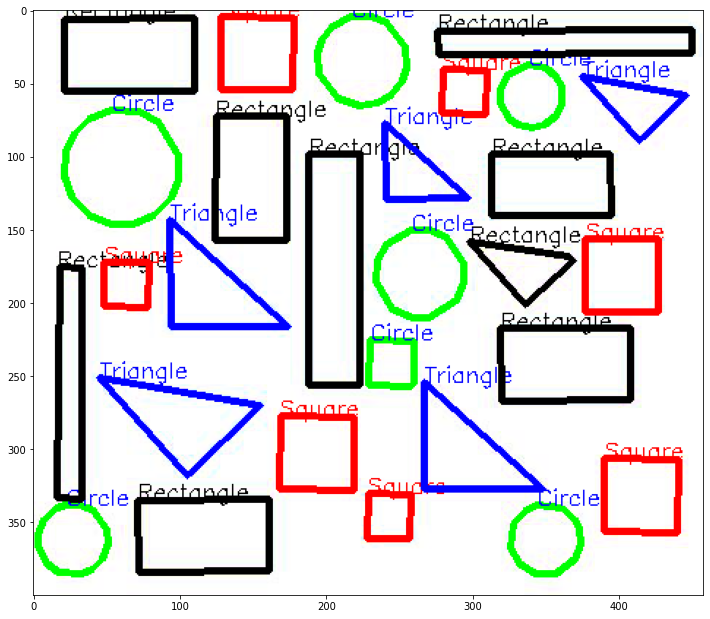

In [109]:
img = cv2.imread('img/shapes.jpg')
imgg = img.copy()
blurr_img = cv2.GaussianBlur(img,(3,3),1)
gray_img = cv2.cvtColor(blurr_img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray_img,220,255,cv2.THRESH_BINARY_INV)
contour,hieraracy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for cnt in contour:
    
    perimeter = cv2.arcLength(cnt,True)
    accuracy = 0.01
    epsilon = accuracy * perimeter
    
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    
    x = approx.ravel()[0]
    y = approx.ravel()[1] 
    
    if len(approx) == 3:
        cv2.drawContours(imgg,[approx],0,(0,0,255),3)
        cv2.putText(imgg,'Triangle',(x,y),cv2.FONT_ITALIC,0.5,(0,0,255),1)
        
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(approx)
        aspect_ratio = w/h
        if aspect_ratio >= 0.95 and aspect_ratio<= 1.05:
            cv2.drawContours(imgg,[approx],0,(255,0,0),3)
            cv2.putText(imgg,'Square',(x,y),cv2.FONT_ITALIC,0.5,(255,0,0),1)
        else:
            cv2.drawContours(imgg,[approx],0,(0,0,0),3)
            cv2.putText(imgg,'Rectangle',(x,y),cv2.FONT_ITALIC,0.5,(0,0,0),1)
            
    else:
        cv2.drawContours(imgg,[approx],0,(0,255,0),3)
        cv2.putText(imgg,'Circle',(x,y),cv2.FONT_ITALIC,0.5,(0,0,255),1)

plt.figure(figsize = (12,12))
plt.imshow(imgg,cmap = 'gray');



In [ ]:
contour,hieraracy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sort_contour = sorted(contour,key = cv2.contourArea,reverse  = True)
contours =  sort_contour[0:4

for i in contours:
    cv2.drawContours(img,contours,i,(0,255,0),3)
    plt.figure(figsize = (12,12))
    plt.imshow(img)

### Coins  counter

1. Create a function that can detect coins and draw  controur around them
2. Count how may coins there are in the image and put it in text on top of the image
3. Crop each coin and save the images on disk, display them on screen, the cropped coin should not have the contour on it
4. Train a image classifier to detect which coins are on the image
5. Put it all together and from the picture of some coins give the total amount of money 
 

### Sudoku Solver

1. Create function that given an image of a Sudoku game crops and extracts each cell 
1. Extract the number from each cropped cell (if blank extract it as 0)
1. Place the extracted numbers in an array (each block of 9 numbers is one array)
1. Apply the sudoku solver to the array to get the solution
1. Write the solution numbers in the cells

## Handwriting recognition Improved

We have already introduced this project in a previous day, if you have already work on it you will just need to go back to your existing code and improve it, if not then you will have to start from scratch

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

### Improvement
1. Write a secuence of 4 numbers or more, for instance it could be a year, a phone number, or anything else, then try to apply everything you now so far and given a original photo of the number you wrote on paper as the input of a function return the number as a string. The function of course will have to process the image, detect and extract the numbers one by one and then recognize them to be able to get the labels, concatenate them (in the right order!) and return them as a single string.

This might not be an simple task, you will need to experiment a lot and try different things, so do not feel discouraged and enjoy the challenge!